<a href="https://colab.research.google.com/github/hitanshu5/Machine-Learning/blob/main/MLEXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Importing the breast cancer dataset

In [ ]:
data = pd.read_csv('/content/Breast_cancer_data (1).csv')
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


Checking to see if any of the features are corelated to each other, if yes then to what extent

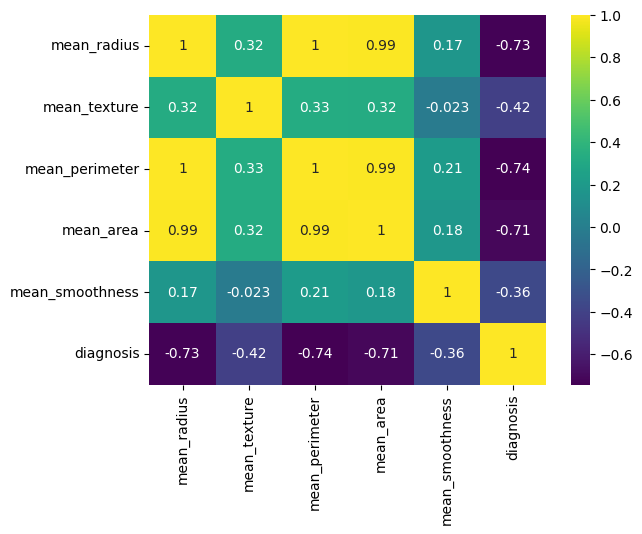

In [ ]:
corr = data.corr()
sns.heatmap(corr,annot = True, cmap='viridis')
plt.show()

We can see that mean_radius, mean_perimeter and mean_area are heavily corelated, hence it is necessary to keep only 1 of these 3 attributes, since we are using naive bayes classifier it make an assumptions that the features are conditionally indepented from each other.

Now we check, which of the features in the data set follow a gaussian distribution.

We can see that area does not follow normal distribution, it is skewed to the right.

<Axes: >

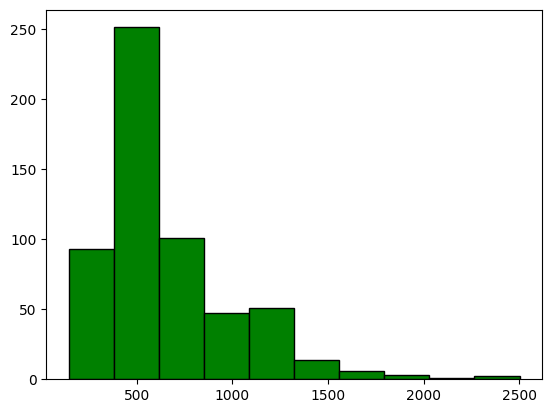

In [ ]:
data['mean_area'].hist(edgecolor='black',grid=False,color='green')

Smoothness follow a normal distribution and hence can be used

<Axes: >

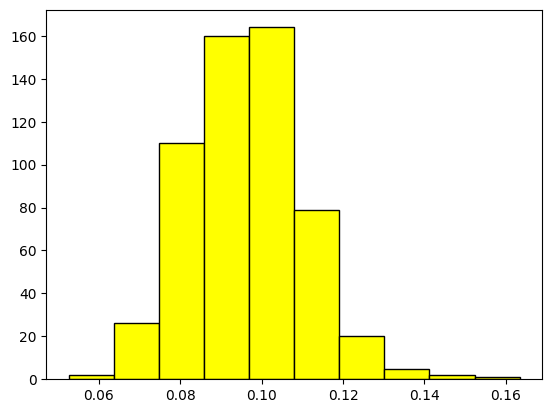

In [ ]:
data['mean_smoothness'].hist(edgecolor='black',grid=False,color='yellow')

Texture follow a normal distribution and hence can be used

<Axes: >

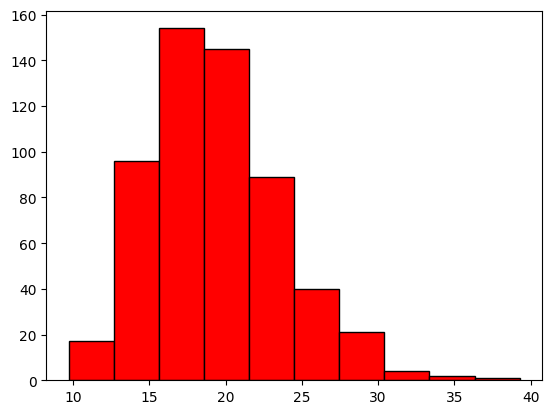

In [ ]:
data['mean_texture'].hist(edgecolor='black',grid=False,color='red')

Texture follow a normal distribution and hence can be used

<Axes: >

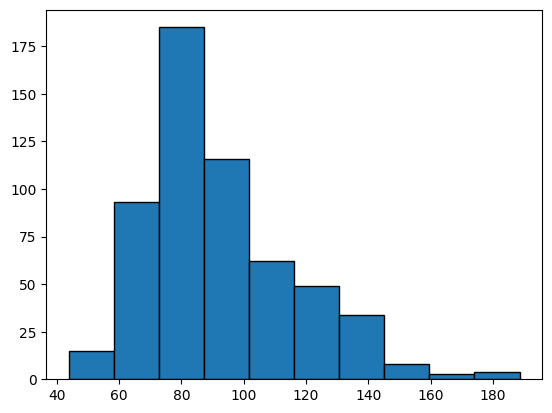

In [ ]:
data['mean_perimeter'].hist(edgecolor='black',grid=False)

Radius follow a normal distribution and hence can be used

<Axes: >

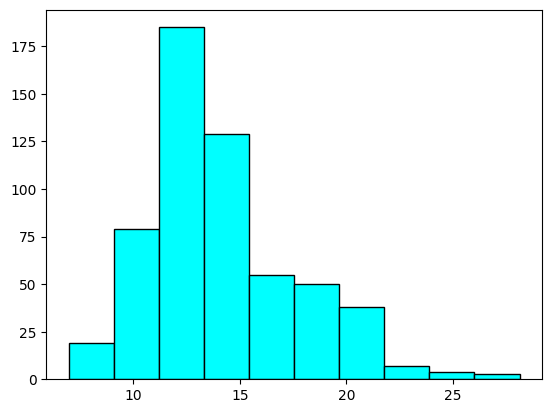

In [ ]:
data['mean_radius'].hist(edgecolor='black',grid=False,color='cyan')

We drop mean_area and mean_perimeter since they are heavily corelated to mean_radius we only keep one of the three features.

In [ ]:
data = data.drop(columns=['mean_area','mean_perimeter'])

# Naive Bayes from Scratch

We calculate the prior probabilites of each of the values of the decision feature.

In [ ]:
def prior_prob(data,class_label):
  labels = list(data[class_label].unique())
  prior = []
  for i in labels:
    prior.append(len(data[data[class_label]==i])/len(data[class_label]))
  return prior
prior_prob(data,'diagnosis')

[0.37258347978910367, 0.6274165202108963]

Then we calculate the likelihood of the the features

In [ ]:
def likelihood_of_feature(data,feature_name,feature_value,y,label):
  feat = list(data.columns)
  data = data[data[y]==label]
  mean = data[feature_name].mean()
  std = data[feature_name].std()
  likelihood = (1/(std*(np.sqrt(2*np.pi))))*np.exp(-(feature_value-mean)**2/(2*std**2))
  return likelihood

In [ ]:
likelihood_of_feature(data,'mean_radius',19.69,'diagnosis',1)

2.835772437459969e-05

In [ ]:
def naive_bayes(data,X,y):
  features = list(data.columns)[:-1]
  prior = prior_prob(data,y)
  y_pred =[]
  for x in X :
    labels = sorted(list(data[y].unique()))
    likelihood = [1]*len(labels)
    for j in range(len(labels)):
      for i in range(len(features)):
        likelihood[j] *= likelihood_of_feature(data,features[i],x[i],y,labels[j])

    post_prob =[1]*len(labels)
    for j in range(len(labels)):
      post_prob[j] =likelihood[j]*prior[j]

    y_pred.append(np.argmax(post_prob))
  return np.array(y_pred)

Then we train the model on the traning samples

In [ ]:
train,test = train_test_split(data,test_size = 0.2,random_state = 50)
x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values
y_pred = naive_bayes(train,X=x_test,y='diagnosis')
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[39  0]
 [ 9 66]]
0.9361702127659575
0.9210526315789473


We get the accuracy of our model to be 92% and f1 score of 93.6% and according to the confusion matrix, we have no false positive

#Using Sklearn library

Dataset 2

In [ ]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
X = data.iloc[:,[1,2,3]].values
y = data.iloc[:,-1].values

In [ ]:
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

Since our dataset has values which are non numerical, we cannot use it directly so we use label encoder to encode the data into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We apply naive bayes classifier to the data

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

We get an accuracy of 84.16% and f1 score of 80.41%

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[62 10]
 [ 9 39]]
0.8041237113402061
0.8416666666666667


Dataset 3

In [ ]:
data = pd.read_csv('/content/german_credit_data.csv')
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


Dropping all the null values in the dataset

In [ ]:
data = data.dropna()

Removing the columns which would not be required

In [ ]:
data = data.drop(columns=['Unnamed: 0','Sex'])
data

,Age,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,2,own,little,moderate,5951,48,radio/TV,bad
3,45,2,free,little,little,7882,42,furniture/equipment,good
4,53,2,free,little,little,4870,24,car,bad
7,35,3,rent,little,moderate,6948,36,car,good
9,28,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...
989,48,1,own,little,moderate,1743,24,radio/TV,good
993,30,3,own,little,little,3959,36,furniture/equipment,good
996,40,3,own,little,little,3857,30,car,good
998,23,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
le = LabelEncoder()

Using label encoder to comvert categorical values to numerical values

In [ ]:
data['Housing'] = le.fit_transform(data['Housing'])
data['Saving accounts'] = le.fit_transform(data['Saving accounts'])
data['Checking account'] = le.fit_transform(data['Checking account'])
data['Purpose'] = le.fit_transform(data['Purpose'])
data['Risk'] = le.fit_transform(data['Risk'])
X = data.drop(columns=['Risk'])
y = data['Risk']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Applying the Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

We get an accuracy of 74% and f1 score of 82.35%

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[22 45]
 [25 65]]
0.65
0.554140127388535
